In [1]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')
# 학원에서는 쓰지말고 아래거 사용

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
# 1.우선실행
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 머신러닝/딥러닝:데이터의 법칙성을 추출
    - 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 얼굴식별,etc...
    
    - 지도학습(회귀,분류) vs 비지도학습(군집) vs 강화학습(게임)

## 1. 데이터셋 생성
## 2. 데이터 전처리

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential #모델생성
from tensorflow.keras.layers import Dense # 모델에 레이어 추가시 
from tensorflow.keras.layers import Input

In [3]:
#학습데이터 == 훈련데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터 
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])


In [4]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a','b','c','b','b'])
print('1. 원 데이터 : ',data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('2. 라벨인코딩된 데이터:', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원 핫 인코딩된 데이터 :\n' , one_hot_encoding_data)

1. 원 데이터 :  ['a' 'b' 'c' 'b' 'b']
2. 라벨인코딩된 데이터: [0 1 2 1 1]
3. 원 핫 인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [61]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1,2,2,5,2])
print('원 데이터: ', data)
categorical_one_hot= to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩\n(넘파이배열)', categorical_one_hot)
import pandas as pd
display('get_dummies를 이용한 원핫 인코딩(데이터프레임)',pd.get_dummies(data))


원 데이터:  [1 2 2 5 2]
to_categorical을 이용한 원 핫 인코딩
(넘파이배열) [[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


'get_dummies를 이용한 원핫 인코딩(데이터프레임)'

,1,2,5
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [62]:
Y_train[:2], Y_val[:2]

(array([2, 4]), array([2, 4]))

In [5]:
# 분류분석을 위해 종속변수(target변수)를 원핫 인코딩
Y_train = to_categorical(Y_train,19)
Y_val= to_categorical(Y_val)

In [5]:
Y_train[:2]


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [6]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((90,), (90, 19), (9,), (9, 19))

## 3. 모델 구성

In [7]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=38,activation='sigmoid')) # units= 출력갯수, activation (활성화 함수)
model.add(Dense(units=64,activation='elu'))
model.add(Dense(units=32,activation='elu'))
model.add(Dense(units=19,activation='softmax'))
# activation ='softmax' :모든 출력의 합이 1.분류분석의 마지막 layer에서 activation 함수로 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


## 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss= 'categorical_crossentropy' :딥러닝 훈련시 다중분류분석에서의 손실함수
            - 모델의 예측 확률 분포와 실제값의 확률 분포가 얼마나 다른지 계산
    * metrics = ['accuracy']

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 5. 모델 학습시키기

In [9]:
hist = model.fit(X_train, Y_train, # 훈련(학습)데이터 
                 epochs     = 300, # 학습 횟수
                 batch_size = 10,  # 가중치를 조정하는 단위
                 verbose    = 2,   # 0: 출력없음, 1: 진행상황만 출력, 2:epoch별 로그메세지
                 validation_data = (X_val, Y_val), # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.8610 - accuracy: 0.1222 - val_loss: 2.6949 - val_accuracy: 0.1111 - 757ms/epoch - 84ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6153 - accuracy: 0.0667 - val_loss: 2.4960 - val_accuracy: 0.1111 - 38ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4499 - accuracy: 0.1333 - val_loss: 2.3578 - val_accuracy: 0.3333 - 40ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3156 - accuracy: 0.2778 - val_loss: 2.2501 - val_accuracy: 0.2222 - 37ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2221 - accuracy: 0.1222 - val_loss: 2.1679 - val_accuracy: 0.1111 - 42ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1537 - accuracy: 0.1667 - val_loss: 2.0975 - val_accuracy: 0.3333 - 43ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0831 - accuracy: 0.2556 - val_loss: 2.0363 - val_accuracy: 0.4444 - 38ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0255 - accuracy: 0.3111 - val_loss: 1.9780 - val_accuracy: 0.4444 - 38ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.4240 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4285 - accuracy: 1.0000 - val_loss: 0.4031 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.4019 - accuracy: 0.9778 - val_loss: 0.3931 - val_accuracy: 0.8889 - 36ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 0.4009 - accuracy: 0.9667 - val_loss: 0.3788 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3911 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3907 - accuracy: 0.9222 - val_loss: 0.3718 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3733 - accuracy: 0.9667 - val_loss: 0.3540 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3535 - accuracy: 1.0000 - val_loss: 0.3339 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0487 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0490 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.0422 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 278/300
9/

## 6.모델과정 평가하기
- 학습과정 중 loss와 평가지표(accuracy),evalate 함수)

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

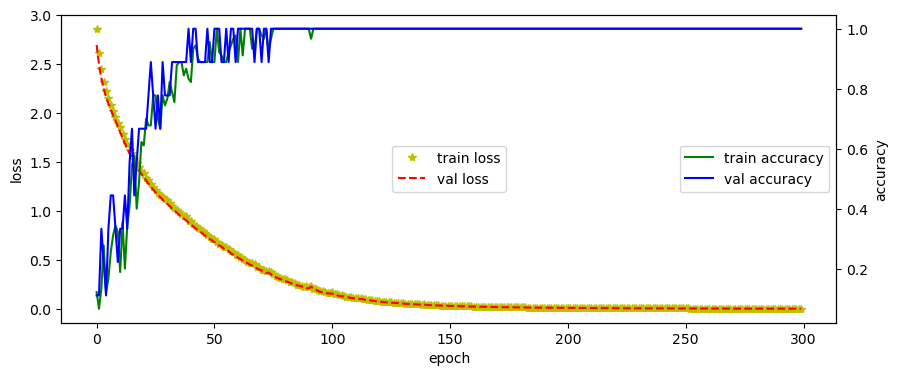

In [35]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='val loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [39]:
# 모델 평가하기
score = model.evaluate(X_val,Y_val,batch_size=3)
score

3/3 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000


[0.0028888462111353874, 1.0]

In [41]:
print('평가된 loss값 : ', score[0])
print('평가된 accuracy:', score[1]*100,'%')

평가된 loss값 :  0.0028888462111353874
평가된 accuracy: 100.0 %


## 7. 모델 사용하기(모델을 사용해서 예측하기) 

In [42]:
H = model.predict(np.array([4]))
H

1/1 [==============================] - 0s 88ms/step


array([[2.7241562e-19, 8.8192533e-18, 1.2701559e-18, 6.1349289e-27,
        1.2991747e-09, 1.2965181e-17, 1.1868750e-03, 1.7011060e-22,
        9.9768877e-01, 1.5678649e-18, 1.1243282e-03, 3.6774143e-22,
        8.6303219e-13, 3.5752087e-21, 1.6235909e-14, 7.9390307e-21,
        6.1050619e-22, 1.5153789e-24, 0.0000000e+00]], dtype=float32)

In [43]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 20ms/step


8

In [45]:
# 몇퍼센트의 확률로 분류되었는지 알고싶을때
H[0,H.argmax()]

0.9976888

## 8. 모델 저장하기

In [46]:
model.save('model/2_deep_begin.h5')

## 저장된 모델 사용하기

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
model2 =load_model('model/2_deep_begin.h5')

In [4]:
H = model2.predict(np.array([2]))
H

1/1 [==============================] - 0s 26ms/step


array([[6.8854496e-25, 1.0397046e-20, 7.1899180e-04, 5.1081191e-38,
        9.9854267e-01, 3.3880143e-23, 7.3841016e-04, 8.6300240e-34,
        2.2664599e-11, 3.6951864e-25, 4.9288079e-19, 4.2483093e-29,
        7.5081988e-34, 6.3787811e-29, 5.5962889e-34, 3.6574168e-27,
        7.2435029e-38, 7.1730223e-32, 0.0000000e+00]], dtype=float32)

In [5]:
H[0,H.argmax()]

0.99854267

In [8]:
[round(val,3) for val in H[0,[2,4,6]]]

[0.001, 0.999, 0.001]